In [73]:
#ds_key = 'adni-100-csts2'
ds_key = 'adni-csts2-validtest'
from dataset_utils import adni_loader
import vte_runner

eval_data_params = vte_runner.named_vte_data_params[ds_key]
print(eval_data_params)
eval_data_params['load_vols'] = False
eval_ds = adni_loader.ADNIDataset(eval_data_params)
_ = eval_ds.load_dataset()

#valid0_ds = eval_ds
#valid_ds = eval_ds


{'dataset_name': 'adni', 'source_name': 'centroidsubj2', 'target_name': 'subjs', 'final_test': False, 'n_validation': 100, 'valid_split': 0, 'exclude_from_valid_list': 'adni-100-csts2-valid.txt', 'unnormalized': True, 'masked': True, 'n_shot': 100, 'use_atlas_as_source': False, 'use_subject': 'OASIS_OAS1_0327_MR1_mri_talairach_orig', 'img_shape': (160, 192, 224, 1), 'pred_img_shape': (160, 192, 1), 'aug_img_shape': (160, 192, 224, 1), 'n_unlabeled': 1, 'load_vols': True, 'aug_in_gen': True, 'n_vte_aug': None, 'n_flow_aug': None, 'use_labels': [0, 16, 10, 49, 8, 47, 4, 43, 7, 46, 12, 51, 2, 41, 28, 60, 11, 50, 13, 52, 17, 53, 14, 15, 18, 54, 24, 3, 42, 31, 63], 'warp_labels': True, 'n_dims': 3}
Loading adni dataset adni-unnorm-masked_1ul_subj-OASIS_OAS1_0327-l_validsplit0
Params: {'dataset_name': 'adni', 'source_name': 'centroidsubj2', 'target_name': 'subjs', 'final_test': False, 'n_validation': 100, 'valid_split': 0, 'exclude_from_valid_list': 'adni-100-csts2-valid.txt', 'unnormalized'

/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/validate/origs/ADNI_ADNI-1.5T-FS-5.3-Long_200434.long.011_S_0241_base_mri_talairach_orig.npz
/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/validate/origs/ADNI_ADNI-1.5T-FS-5.3-Long_101774.long.094_S_1314_base_mri_talairach_orig.npz
/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/validate/origs/ADNI_ADNI-1.5T-FS-5.3-Long_101933.long.127_S_1419_base_mri_talairach_orig.npz
/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/validate/origs/ADNI_ADNI-1.5T-FS-5.3-Long_82120.long.012_S_0803_base_mri_talairach_orig.npz
/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/validate/origs/ADHD200_NYU_1737393_mri_talairach_orig.npz
/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/validate/origs/GSP_100729_AM54XC_FS_mri_talairach_orig.npz
/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/validate/origs/ADNI_ADNI-3T-FS-5.3-Long_78935.long.033_S_1279_base_mri_talairach_orig.npz
/data/ddmg/voxel

In [9]:
do_final_test = False

%load_ext autoreload
%autoreload 2
import json
import os
import sys

import keras.backend as K
from keras.models import load_model
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf

from dataset_utils import adni_loader

gpu_ids = [3]
# set gpu id and tf settings
os.environ['CUDA_VISIBLE_DEVICES']=','.join([str(g) for g in gpu_ids])
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.tensorflow_backend.set_session(tf.Session(config=config))



Load Segmenter experiment

In [10]:
import json
import os
import sys

sys.path.append('../cnn_utils')
import file_utils
from keras.models import load_model

from experiments_VTE import FewShotSegmentationExperimentClass
from keras.models import load_model
from keras.optimizers import Adam

sys.path.append('../voxelmorph')
import src.losses as vm_losses

sys.path.append('../medipy-lib')
import medipy.metrics as medipy_metrics


These are legacy implementations of spatial transformers. Recommend use of neuron.layers.SpatialTransformer() instead
FewShotSeg_adni-unnorm-masked_100ul_subj-OASIS_OAS1_0327-l_ims160-192-1_arch32-32-64-64-128-128_augflow-amp200_blur12_randmult0.5_vteaug-gen-unets_seq_bidir_test_wrapper_colorunet-colorregwt1-e1010_flowaug-gen_segmenter_unet_epoch9000_iter63000


['/data/ddmg/voxelmorph/data/t1_mix/proc/resize256-crop_x32/train/origs/OASIS_OAS1_0327_MR1_mri_talairach_orig.npz']


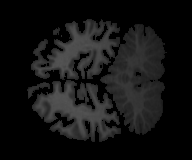

Testing on subject 0 of 100
Sampling size 1 batches from 100 volumes!
0.8598024140776278
Testing on subject 1 of 100
0.8673113009101897
Testing on subject 2 of 100
0.8983073662344614
Testing on subject 3 of 100
0.8691819643290211
Testing on subject 4 of 100
0.8867706565540816
Testing on subject 5 of 100
0.8945101212915916
Testing on subject 6 of 100
0.911634649241139
Testing on subject 7 of 100
0.9112908978383699
Testing on subject 8 of 100
0.9077077132359781
Testing on subject 9 of 100
0.8857473173173571
Testing on subject 10 of 100
0.8917207340131668
Testing on subject 11 of 100
0.9048083101236917
Testing on subject 12 of 100
0.9299939790476031
Testing on subject 13 of 100
0.9148740599058174
Testing on subject 14 of 100
0.9080385364083275
Testing on subject 15 of 100
0.898344662451641
Testing on subject 16 of 100
0.8930086408699868
Testing on subject 17 of 100
0.9144449617830281
Testing on subject 18 of 100
0.9034550632911392
Testing on subject 19 of 100
0.8996837911628685
Testing on

In [84]:
# save our test results in a mat file so that we can parse them later

In [2]:
import vte_runner
results_dir = './segmentation_test_results'
label_mapping = vte_runner.voxelmorph_labels
mode='valid'

Using TensorFlow backend.
../cnn_utils/vis_utils.py:14: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('Agg')
../cnn_utils/vis_utils.py:14: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('Agg')


In [129]:
import os
import scipy.io as sio
import numpy as np
n_eval_examples = 100#eval_ds.params['n_validation']
mode='valid'

n_subjects = n_eval_examples
#ds_name = '{}_{}_'.format(eval_ds.display_name, mode)
cce_per_result = []
dice_per_result = []
acc_per_result = []
result_names = []
for rfn in os.listdir(results_dir):
#     if ds_name not in rfn:
#         continue
    
    result = sio.loadmat(os.path.join(results_dir, rfn))
    result_name = os.path.splitext(os.path.basename(rfn))[0]
    result_name = result_name.split('valid_')[-1]
    print(result_name)
    print(result['cce'].shape)
    if result['cce'].shape[-1] < n_subjects:
        continue
    result_names.append(result_name)
    cce_per_result.append(result['cce'])
    acc_per_result.append(result['acc'])
    dice_per_result.append(result['dice'][np.newaxis])
print(result_names)
sort_results_by_name = ['supervised', 'ours-indep-hand-aug','ours-indep','ours-coupled', 'hand-aug', 'sas-aug', 'sas', 'no-aug']

sorted_acc = []
sorted_dice = []
for rn in sort_results_by_name:
    idx = result_names.index(rn)
    sorted_acc.append(acc_per_result[idx])
    sorted_dice.append(dice_per_result[idx])
result_names = sort_results_by_name
# result_names, cce_per_result, acc_per_result, dice_per_result = zip(*sorted(zip(result_names, cce_per_result, acc_per_result, dice_per_result)))

acc_per_result = np.concatenate(sorted_acc, axis=0)
dice_per_result = np.concatenate(sorted_dice, axis=0)


no-aug
(1, 100)
hand-aug
(1, 100)
sas
(1, 100)
sas-aug
(1, 100)
supervised
(1, 100)
ours-ft
(1, 100)
ours-indep
(1, 100)
ours-coupled
(1, 100)
ours-indep-hand-aug
(1, 100)
['no-aug', 'hand-aug', 'sas', 'sas-aug', 'supervised', 'ours-ft', 'ours-indep', 'ours-coupled', 'ours-indep-hand-aug']


supervised
ours-ft
ours-indep
ours-coupled
hand-aug
sas-aug
sas
no-aug


(8, 100)
(8, 100, 31)
Result supervised, dice mean 0.849, std 0.092
0.849 (0.092)
Result ours-ft, dice mean 0.803, std 0.13
0.803 (0.13)
Result ours-indep, dice mean 0.804, std 0.13
0.804 (0.13)
Result ours-coupled, dice mean 0.795, std 0.133
0.795 (0.133)
Result hand-aug, dice mean 0.765, std 0.143
0.765 (0.143)
Result sas-aug, dice mean 0.769, std 0.146
0.769 (0.146)
Result sas, dice mean 0.758, std 0.138
0.758 (0.138)
Result no-aug, dice mean 0.401, std 0.313
0.401 (0.313)


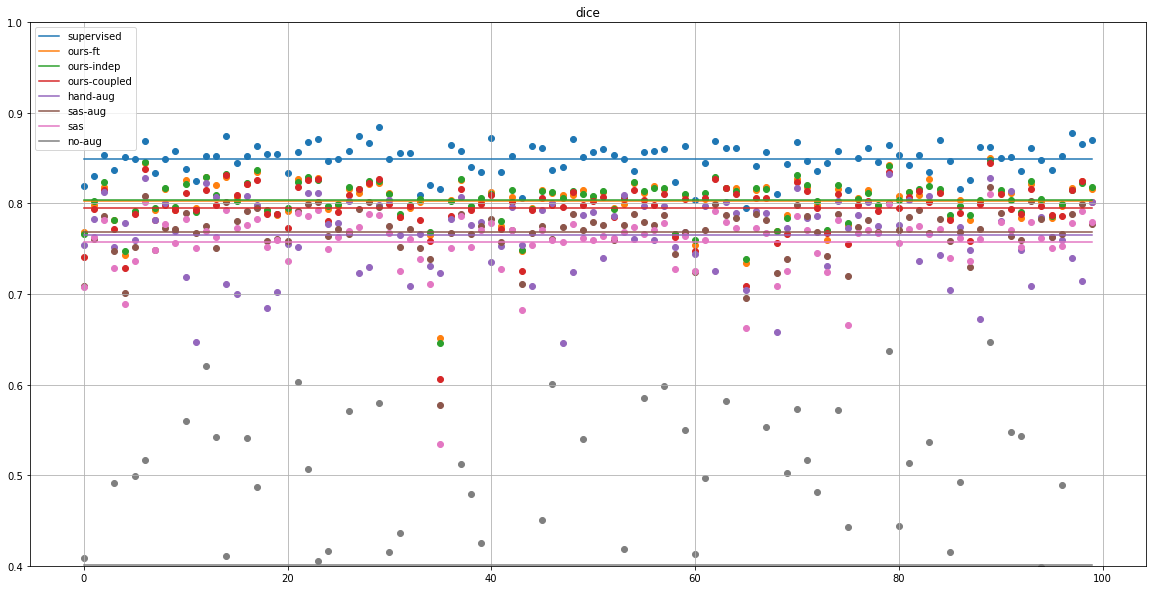

Result supervised, acc mean 0.916, std 0.013
0.916 (0.013)
Result ours-ft, acc mean 0.89, std 0.017
0.89 (0.017)
Result ours-indep, acc mean 0.892, std 0.017
0.892 (0.017)
Result ours-coupled, acc mean 0.885, std 0.018
0.885 (0.018)
Result hand-aug, acc mean 0.888, std 0.024
0.888 (0.024)
Result sas-aug, acc mean 0.859, std 0.016
0.859 (0.016)
Result sas, acc mean 0.812, std 0.018
0.812 (0.018)
Result no-aug, acc mean 0.648, std 0.123
0.648 (0.123)


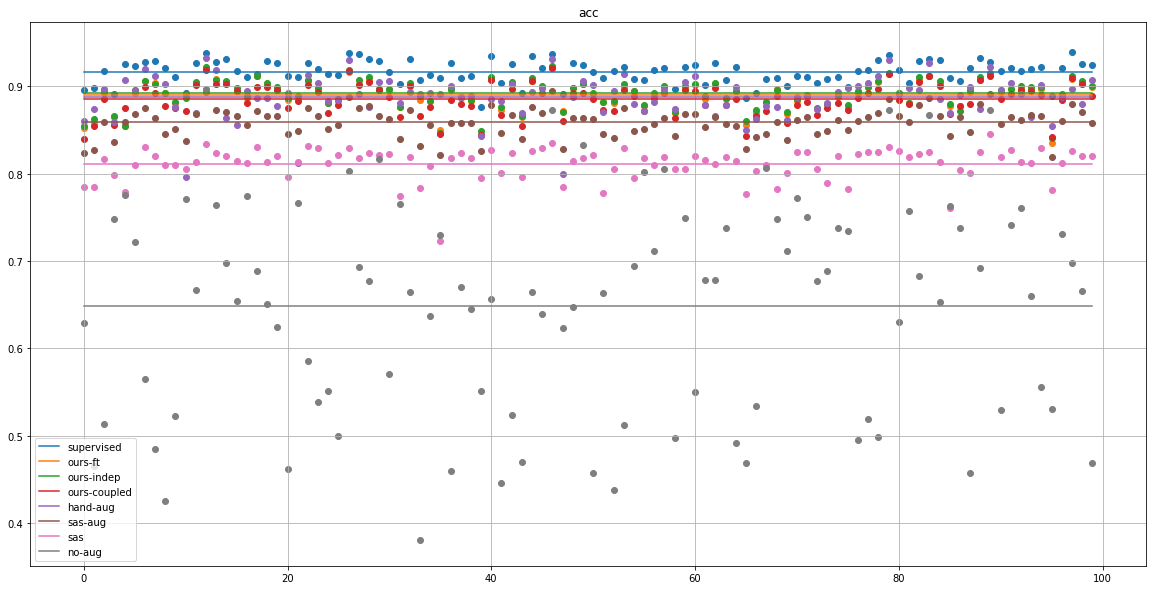

In [149]:
x = np.tile(np.reshape(range(n_subjects), (1, n_subjects)), (len(result_names), 1))
print(acc_per_result.shape)
import matplotlib.pyplot as plt
print(dice_per_result.shape)
plt.figure(figsize=(20,10))
for ri, rn in enumerate(result_names):
    x = range(n_subjects)
    
    plt.scatter(x, np.mean(dice_per_result[ri, :, 1:], axis=-1))
    plt.plot(x, np.tile(np.mean(dice_per_result[ri,:,1:]), (np.asarray(x).shape)))
    print('Result {}, dice mean {}, std {}'.format(rn,
        round(np.mean(dice_per_result[ri,:,1:]), 3), 
                                                   round(np.std(dice_per_result[ri,:,1:]),3)))
    print('{} ({})'.format(
        round(np.mean(dice_per_result[ri,:,1:]), 3), 
        round(np.std(dice_per_result[ri,:,1:]),3)))
    plt.ylim([0.4, 1.])
plt.legend(short_result_names)
plt.title('dice')

plt.grid()
plt.show()

plt.figure(figsize=(20,10))
for ri, rn in enumerate(result_names):
    x = range(n_subjects)
    
    plt.scatter(x, acc_per_result[ri])
    plt.plot(x, np.tile(np.mean(acc_per_result[ri]), (np.asarray(x).shape)))
    print('Result {}, acc mean {}, std {}'.format(rn, round(np.mean(acc_per_result[ri]),3), 
                                                  round(np.std(acc_per_result[ri]), 3)))
    print('{} ({})'.format(
        round(np.mean(acc_per_result[ri]),3), 
        round(np.std(acc_per_result[ri]), 3)))    
plt.legend(short_result_names)

plt.title('acc')
plt.grid()
plt.show()




In [130]:
# improvement over sas
ref_dice = dice_per_result[result_names.index('sas')]
improvements_per_alg = []
for ri, rn in enumerate(result_names):
    dice_diff = dice_per_result[ri] - ref_dice
    print('Result {}, dice improvement over sas mean {}, std {}'.format(
        rn, round(np.mean(dice_diff),3), 
        round(np.std(dice_diff), 3)))
    print('{} ({})'.format(
         round(np.mean(dice_diff),3), 
        round(np.std(dice_diff), 3))) 
    print(dice_diff.shape)
    improvements_per_alg.append(np.mean(dice_diff, axis=-1)[np.newaxis])
improvements_per_alg = np.concatenate(improvements_per_alg, axis=0)


Result supervised, dice improvement over sas mean 0.088, std 0.072
0.088 (0.072)
(100, 31)
Result ours-indep-hand-aug, dice improvement over sas mean 0.055, std 0.044
0.055 (0.044)
(100, 31)
Result ours-indep, dice improvement over sas mean 0.045, std 0.038
0.045 (0.038)
(100, 31)
Result ours-coupled, dice improvement over sas mean 0.036, std 0.035
0.036 (0.035)
(100, 31)
Result hand-aug, dice improvement over sas mean 0.007, std 0.086
0.007 (0.086)
(100, 31)
Result sas-aug, dice improvement over sas mean 0.011, std 0.037
0.011 (0.037)
(100, 31)
Result sas, dice improvement over sas mean 0.0, std 0.0
0.0 (0.0)
(100, 31)
Result no-aug, dice improvement over sas mean -0.346, std 0.271
-0.346 (0.271)
(100, 31)


(8, 100)


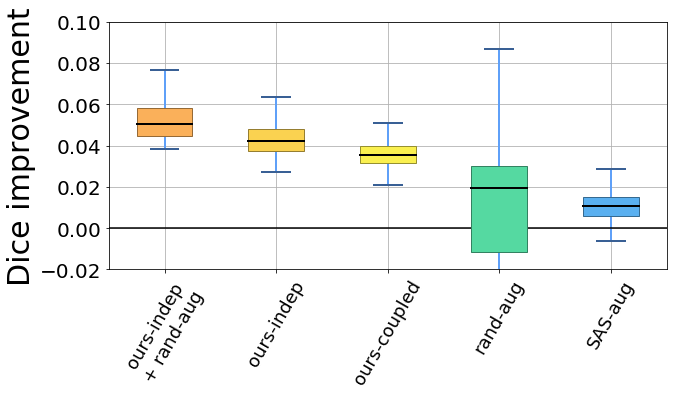

In [340]:
fig = plt.figure(figsize=(10,8))
show_alg_idxs = [result_names.index('ours-indep-hand-aug'),result_names.index('ours-indep'),result_names.index('ours-coupled'), result_names.index('hand-aug'), result_names.index('sas-aug')]
show_alg_names = [
    result_names[ri].replace(
        'sas','SAS').replace(
        'ours-indep-hand-aug', 'ours-indep\n+ rand-aug').replace(
        'hand-aug','rand-aug'
    ) for ri in show_alg_idxs]
print(improvements_per_alg.shape)
# plt.boxplot(np.transpose(improvements_per_alg[show_alg_idxs]))
# plt.grid()
ax = boxplot_utils.make_boxplot(show_alg_names, np.transpose(improvements_per_alg[show_alg_idxs]), None, fig=fig)
plt.xticks(rotation=60)
ax.axhline(y=0, c='black')
ax.set_ylim([-0.02,0.1])
ax.set_ylabel('Dice improvement', fontsize=30)

plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


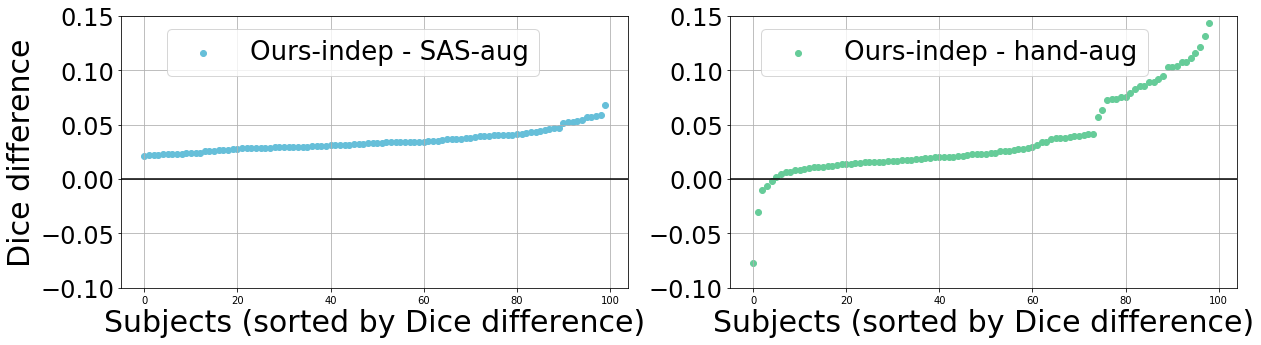

In [68]:
import matplotlib.pyplot as plt
ours_idx = result_names.index('ours-indep')
hand_idx = result_names.index('hand-aug')
sasaug_idx = result_names.index('sas-aug')

dice_diff_us_handaug = np.mean(dice_per_result[ours_idx,:,1:], axis=-1) - np.mean(dice_per_result[hand_idx,:,1:], axis=-1)
dice_diff_us_sasaug = np.mean(dice_per_result[ours_idx,:,1:], axis=-1) - np.mean(dice_per_result[sasaug_idx,:,1:], axis=-1)
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
x = range(n_subjects)
sort_idxs = np.argsort(dice_diff_us_sasaug)
ax1.scatter(x, dice_diff_us_sasaug[sort_idxs], c=[0.4, 0.75, 0.85])
ax1.set_xlabel('Subjects (sorted by Dice difference)', fontsize=30)
ax1.set_ylabel('Dice difference', fontsize=30)
ax1.grid()
plt.tick_params(axis='y', which='major', labelsize=24)
ax1.legend(['Ours-indep - SAS-aug'], fontsize=26, bbox_to_anchor=(0.85, 1))
ax1.tick_params(axis='y', which='major', labelsize=24)
ax1.set_ylim([-0.1, 0.15])
ax1.axhline(y=0, c='black')

sort_idxs = np.argsort(dice_diff_us_handaug)
ax2.scatter(x, dice_diff_us_handaug[sort_idxs], c=[0.4, 0.8, 0.6])
plt.xlabel('Subjects (sorted by Dice difference)', fontsize=30)
#plt.ylabel('Dice difference', fontsize=30)
ax2.grid()
ax2.set_ylim([-0.1, 0.15])

ax2.legend(['Ours-indep - hand-aug'], fontsize=26, bbox_to_anchor=(0.85, 1))
ax2.axhline(y=0, c='black')
ax2.tick_params(axis='y', which='major', labelsize=24)
# plt.scatter(x, dice_diff_us_sasaug[sort_idxs])
#plt.plot(range(-1, n_subjects+1), np.asarray(x)*0)

# plt.legend(['zero','Ours - handaug (dice)', 'Ours - sasaug (dice)'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[0.03918646 0.03956783 0.04031241 0.04042462 0.0404966  0.04054442
 0.04111392 0.04132504 0.04183878 0.04261516 0.04282415 0.04317519
 0.04327246 0.04348747 0.04359984 0.04364847 0.04395688 0.04397567
 0.04423241 0.0443736  0.04444695 0.04449563 0.04469663 0.04477141
 0.04516479 0.04586058 0.04593248 0.04603873 0.04625048 0.04664934
 0.04672056 0.04707716 0.0481273  0.04818467 0.0483254  0.04852248
 0.04861234 0.04883013 0.04913741 0.04990798 0.05011068 0.05017047
 0.05020749 0.05052745 0.05064403 0.05066775 0.0508856  0.05108168
 0.05123431 0.05192623 0.05216787 0.05261023 0.05327501 0.05349211
 0.0536583  0.05415033 0.05421167 0.05423639 0.05438384 0.05461883
 0.05485762 0.05525184 0.05536655 0.05540001 0.0555705  0.05669816
 0.05681647 0.05723705 0.05755075 0.05785396 0.05846728 0.05851276
 0.05874652 0.05877673 0.05914522 0.06116048 0.06150343 0.06185672
 0.06283259 0.06371831 0.06436881 0.06466974 0.06591211 0.06609684
 0.06734523 0.06799673 0.06880542 0.06903197 0.06927064 0.0741

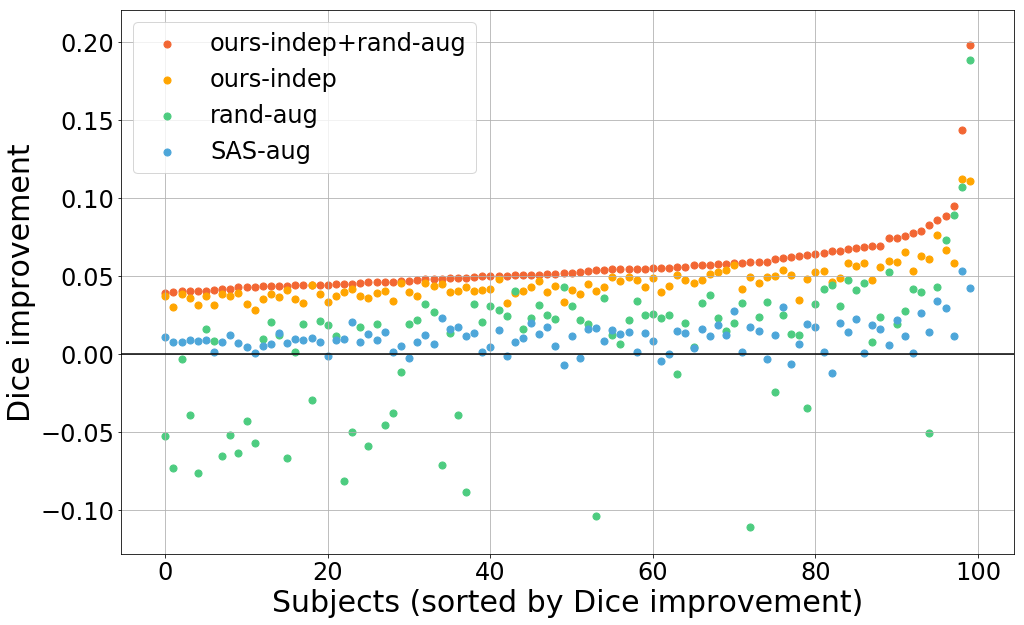

In [335]:
import matplotlib.pyplot as plt
ourshand_idx = result_names.index('ours-indep-hand-aug')
ourscoup_idx = result_names.index('ours-coupled')
ours_idx = result_names.index('ours-indep')
hand_idx = result_names.index('hand-aug')
sasaug_idx = result_names.index('sas-aug')
sas_idx = result_names.index('sas')

include_label_idxs = range(1, n_labels)#np.asarray([label_names.index('Left-Hippocampus'), label_names.index('Right-Hippocampus')])

dice_diff_ushand_sas = np.mean(dice_per_result[ourshand_idx,:,include_label_idxs], axis=0) - np.mean(dice_per_result[sas_idx,:,include_label_idxs], axis=0)
dice_diff_us_sas = np.mean(dice_per_result[ours_idx,:,include_label_idxs], axis=0) - np.mean(dice_per_result[sas_idx,:,include_label_idxs], axis=0)
#dice_diff_uscoup_sas = np.mean(dice_per_result[ourscoup_idx,:,1:], axis=-1) - np.mean(dice_per_result[sas_idx,:,1:], axis=-1)
dice_diff_handaug_sas = np.mean(dice_per_result[hand_idx,:,include_label_idxs], axis=0) - np.mean(dice_per_result[sas_idx,:,include_label_idxs], axis=0)
dice_diff_sasaug_sas = np.mean(dice_per_result[sasaug_idx,:,include_label_idxs], axis=0) - np.mean(dice_per_result[sas_idx,:,include_label_idxs], axis=0)

sort_idxs = np.argsort(dice_diff_ushand_sas)#np.mean(dice_per_result[sas_idx,:,1:], axis=-1))
print(dice_diff_ushand_sas[sort_idxs])
fig = plt.figure(figsize=(16,10))
x = range(n_subjects)
s=50
plt.scatter(x, dice_diff_ushand_sas[sort_idxs], c=[0.95, 0.4, 0.2],s=s)
plt.scatter(x, dice_diff_us_sas[sort_idxs], c='orange', s=s)
# plt.scatter(x, dice_diff_uscoup_sas[sort_idxs])
plt.scatter(x, dice_diff_handaug_sas[sort_idxs],c=[0.3, 0.8, 0.5], s=s)
plt.scatter(x, dice_diff_sasaug_sas[sort_idxs], c=[0.3, 0.65, 0.85], s=s)
#plt.plot(x, np.mean(dice_per_result[sas_idx,sort_idxs,1:], axis=-1))
plt.legend(['ours-indep+rand-aug', 'ours-indep', 'rand-aug', 'SAS-aug'], fontsize=24)
plt.xlabel('Subjects (sorted by Dice improvement)', fontsize=30)
plt.ylabel('Dice improvement', fontsize=30)
plt.tick_params(axis='y', which='major', labelsize=24)
plt.tick_params(axis='x', which='major', labelsize=24)
plt.axhline(y=0, c='black')
plt.grid()
# fig = plt.figure(figsize=(20,5))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
# x = range(n_subjects)
# sort_idxs = np.argsort(dice_diff_us_sasaug)
# ax1.scatter(x, dice_diff_us_sasaug[sort_idxs], c=[0.4, 0.75, 0.85])
# ax1.set_xlabel('Subjects (sorted by Dice difference)', fontsize=30)
# ax1.set_ylabel('Dice difference', fontsize=30)
# ax1.grid()
# plt.tick_params(axis='y', which='major', labelsize=24)
# ax1.legend(['Ours-indep - SAS-aug'], fontsize=26, bbox_to_anchor=(0.85, 1))
# ax1.tick_params(axis='y', which='major', labelsize=24)
# ax1.set_ylim([-0.1, 0.15])
# ax1.axhline(y=0, c='black')

# sort_idxs = np.argsort(dice_diff_us_handaug)
# ax2.scatter(x, dice_diff_us_handaug[sort_idxs], c=[0.4, 0.8, 0.6])
# plt.xlabel('Subjects (sorted by Dice difference)', fontsize=30)
# #plt.ylabel('Dice difference', fontsize=30)
# ax2.grid()
# ax2.set_ylim([-0.1, 0.15])

# ax2.legend(['Ours-indep - hand-aug'], fontsize=26, bbox_to_anchor=(0.85, 1))
# ax2.axhline(y=0, c='black')
# ax2.tick_params(axis='y', which='major', labelsize=24)
# plt.scatter(x, dice_diff_us_sasaug[sort_idxs])
#plt.plot(range(-1, n_subjects+1), np.asarray(x)*0)

# plt.legend(['zero','Ours - handaug (dice)', 'Ours - sasaug (dice)'])

In [109]:
label_sizes = []
for l in label_mapping:
    label_sizes.append(np.sum(eval_ds.Y_atlas==l))
total_brain_vol = np.sum(eval_ds.Y_atlas>0)
print(total_brain_vol)
sorted_label_sizes, sort_label_idxs = zip(*sorted(zip(label_sizes, range(len(label_sizes)))))
sort_label_idxs = list(sort_label_idxs)
print(sorted_label_sizes)
print([ls/float(total_brain_vol) for ls in sorted_label_sizes])
sorted_label_percentages = [sls / float(total_brain_vol) for sls in sorted_label_sizes]

# get label names
label_names_file = '/afs/csail.mit.edu/u/x/xamyzhao/voxelmorph-sandbox/voxelmorph/jupyter/label_names.txt'
with open(label_names_file, 'r') as f:
    label_names = f.readlines()
label_name_mapping = [f.strip() for f in label_names]

label_names = [label_name_mapping[li] for li in label_mapping]
sorted_label_names = [label_names[si] for si in sort_label_idxs]

print(sort_label_idxs)

1659588
(682, 996, 1322, 1542, 1741, 1838, 2054, 2085, 2559, 4009, 4134, 4862, 4971, 5749, 5899, 5957, 6008, 8807, 9085, 12262, 14061, 17282, 17459, 28516, 71348, 73790, 334947, 336479, 338885, 340259, 5221692)
[0.00041094536716341644, 0.000600148952631617, 0.0007965832483724876, 0.0009291462700381059, 0.0010490555487265513, 0.0011075037900973013, 0.0012376565750053627, 0.0012563359098764272, 0.0015419489656468956, 0.0024156597902611973, 0.002490979688934844, 0.0029296427788101627, 0.0029953217304535826, 0.0034641127797983597, 0.0035544966582067355, 0.0035894450911913077, 0.0036201756098501554, 0.005306738780950453, 0.005474250235600643, 0.0073885807802900475, 0.00847258476200117, 0.0104134279110237, 0.010520080887545583, 0.017182577844621676, 0.042991393044538764, 0.044462842585027126, 0.20182539280833556, 0.20274851348647976, 0.20419827089615014, 0.20502618722237084, 3.1463784987599333]
[29, 30, 26, 22, 24, 25, 18, 19, 23, 16, 17, 20, 21, 15, 11, 14, 10, 3, 2, 7, 6, 8, 9, 1, 5, 4, 28

In [ ]:
# optional: sort by combined label volume rather than individual

# # get label names
# label_names_file = '/afs/csail.mit.edu/u/x/xamyzhao/voxelmorph-sandbox/voxelmorph/jupyter/label_names.txt'
# with open(label_names_file, 'r') as f:
#     label_names = f.readlines()
    
# # combine left and right
# combined_label_names, _ = label_utils.combine_lr_dice(
#     label_names, np.transpose(dice_per_result[0][:, :], (1, 0)))

# # find total vol of combined labels
# label_sizes = []
# for li, cln in enumerate(combined_label_names):
#     label_ids = [lid for i, lid in enumerate(label_mapping) if label_names[i] in cln]
    
#     label_vol = 0
#     for l in label_ids:
#         label_vol += np.sum(eval_ds.Y_atlas==l)
#     label_sizes.append(label_vol)
        
# total_brain_vol = np.sum(eval_ds.Y_atlas>0)
# print(total_brain_vol)
# sorted_label_sizes, sort_label_idxs = zip(*sorted(zip(label_sizes, range(len(label_sizes)))))
# sort_label_idxs = list(sort_label_idxs)
# print(sorted_label_sizes)
# print([ls/float(total_brain_vol) for ls in sorted_label_sizes])
# sorted_label_percentages = [sls / float(total_brain_vol) for sls in sorted_label_sizes]


# label_name_mapping = [f.strip() for f in label_names]

# label_names = [label_name_mapping[li] for li in label_mapping]
# sorted_label_names = [label_names[si] for si in sort_label_idxs]

# print(sort_label_idxs)

In [213]:
small_label_idxs = [si for si, slp in enumerate(sorted_label_percentages) if slp <= 0.04]
#med_label_idxs = [si for si, slp in enumerate(sorted_label_percentages) if slp > 0.005 and slp <= 0.1]
large_label_idxs = [si for si, slp in enumerate(sorted_label_percentages) if slp > 0.04 and slp < 1]


print(result_names)
#sort_result_idxs = [-2, 0, 1, 2, -1, 3]
keep_result_idxs = [1, 2, 4, 5, 6]
sorted_short_result_names = [result_names[ri] for ri in keep_result_idxs]
print(sorted_short_result_names)

['supervised', 'ours-indep-hand-aug', 'ours-indep', 'ours-coupled', 'hand-aug', 'sas-aug', 'sas', 'no-aug']
['ours-indep-hand-aug', 'ours-indep', 'hand-aug', 'sas-aug', 'sas']


(8, 100, 31)
(100,)


Ttest_relResult(statistic=-36.457518188181254, pvalue=3.474835901014851e-59)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['Left-Cerebral-W. Matter', 'Right-Cerebral-W. Matter', 'Left-Cerebral-Cortex', 'Right-Cerebral-Cortex', 'Left-Cerebellum-Cortex', 'Right-Cerebellum-Cortex', 'Brain-Stem', 'Right-Cerebellum-W. Matter', 'Left-Cerebellum-W. Matter', 'Left-Lateral-Ventricle', 'Right-Lateral-Ventricle', 'Left-Thalamus', 'Right-Thalamus', 'Left-Putamen', 'Left-VentralDC', 'Right-Putamen', 'Right-VentralDC', 'Right-Hippocampus', 'Left-Hippocampus', 'Right-Caudate', 'Left-Caudate', '4th-Ventricle', 'Right-Pallidum', 'Left-Pallidum', 'Right-Amygdala', 'Left-Amygdala', '3rd-Ventricle', 'CSF', 'Right-choroid-plexus', 'Left-choroid-plexus']


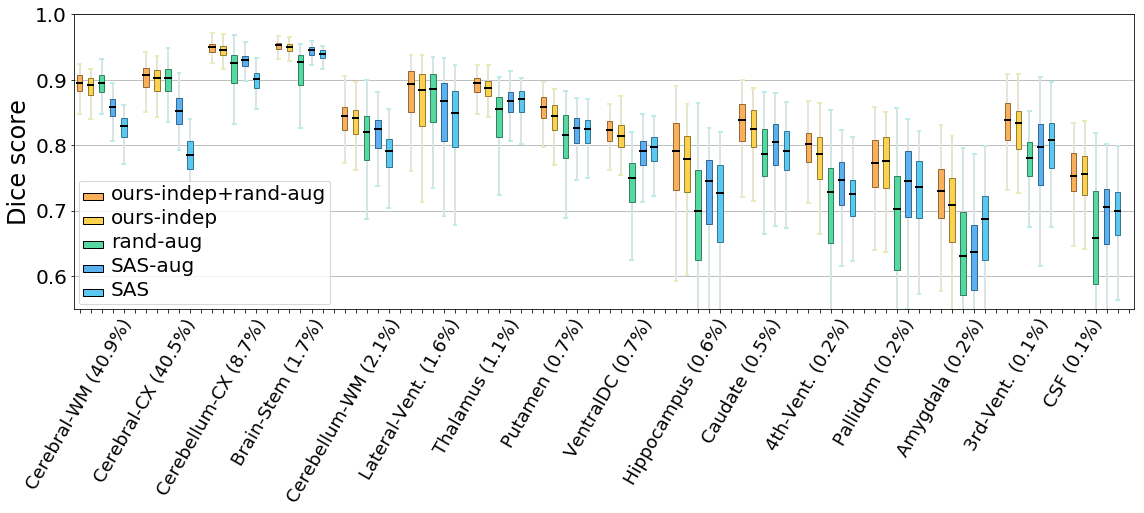

In [344]:
# absolute dice per label
%load_ext autoreload
%autoreload 2
# format data the way that old voxelmorph boxplot code expects
import sys
sys.path.append('../voxelmorph-sandbox')
from voxelmorph.visualization import boxplot_utils, label_utils

#visualize_sorted_label_idxs = large_label_idxs
# visualize all labels
visualize_sorted_label_idxs = range(len(label_mapping))


baseline_name = 'sas-aug'


keep_result_idxs = [ result_names.index('ours-indep-hand-aug'),  result_names.index('ours-indep'), 
                     result_names.index('hand-aug'), result_names.index('sas-aug'), result_names.index('sas')]
show_result_names = [result_names[ri] for ri in keep_result_idxs]

# exclude bkg
show_label_idxs = list(reversed([sort_label_idxs[si] for si in visualize_sorted_label_idxs]))[1:]
show_label_names = list(reversed([sorted_label_names[si] for si in visualize_sorted_label_idxs]))[1:]
print(show_label_names)

boxplot_label_names = []
dice_vals = []

for ri, rn in enumerate(show_result_names):
    combined_labels, combined_scores = label_utils.combine_lr_dice(
        show_label_names, 
        np.transpose(dice_per_result[result_names.index(rn)][:, show_label_idxs], (1, 0)),
        verbose=False,
    )
    combined_labels = combined_labels[:-1]  # ignore choroid
    
    #boxplot_label_names.append([ln + '_{}'.format(rn) for ln in show_label_names])
    #dice_vals.append(np.transpose(dice_per_result[result_names.index(rn)][:, show_label_idxs], (1, 0)))
    
    for ci, cl in enumerate(combined_labels):
        matching_label_idxs = [i for i in range(len(sorted_label_names)) if cl in sorted_label_names[i]]
        total_percentage = np.sum(np.asarray(sorted_label_percentages)[matching_label_idxs])
        combined_labels[ci] += ' ({}%)'.format(round(100.*total_percentage,1)) 
    combined_labels = [cl.replace('W. Matter','WM').replace('Cortex','CX').replace('Ventricle','Vent.') for cl in combined_labels]
    boxplot_label_names += [combined_labels]
    dice_vals += [np.asarray(combined_scores)]

labels_to_display, labels_with_model_name_to_display, vals_to_display = boxplot_utils.format_data_for_boxplot(
    boxplot_label_names, dice_vals, adjust_for_rotated_labels=True)

ax = boxplot_utils.make_boxplot(
    labels_to_display, vals_to_display, 
    [rn.replace('sas','SAS').replace(
        'ours-indep-hand-aug','ours-indep+rand-aug').replace(
        'hand-aug','rand-aug'
    ) for rn in show_result_names],
    color_whiskers=True,
    color_caps=True
)
ax.set_ylim([0.55, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(False)
plt.xticks(rotation=60)


import matplotlib.ticker as plticker
loc = plticker.MultipleLocator(base=0.1)
#ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# loc = plticker.MultipleLocator(base=5)
# ax.xaxis.set_minor_locator(loc)
#ax.yaxis.set_major_locator(loc)

ax.tick_params(axis='y', which='minor', labelsize=18)
# ax.get_yaxis().set_ticklabels(range(10))
ax.axhline(y=0, c=[0.3, 0.65, 0.85])
#ax.get_xaxis().set_ticklabels([])
plt.ylabel('Dice score', fontsize=24)
plt.show()


In [278]:
# line plot instead?
# absolute dice per label
%load_ext autoreload
%autoreload 2
# format data the way that old voxelmorph boxplot code expects
import sys
sys.path.append('../voxelmorph-sandbox')
from voxelmorph.visualization import boxplot_utils, label_utils

#visualize_sorted_label_idxs = large_label_idxs
# visualize all labels
visualize_sorted_label_idxs = range(len(label_mapping))


baseline_name = 'sas-aug'


keep_result_idxs = [ result_names.index('ours-indep-hand-aug'),  result_names.index('ours-indep'), 
                     result_names.index('hand-aug'), result_names.index('sas-aug'),]
show_result_names = [result_names[ri] for ri in keep_result_idxs]

# exclude bkg
show_label_idxs = list(reversed([sort_label_idxs[si] for si in visualize_sorted_label_idxs]))[1:]
show_label_names = list(reversed([sorted_label_names[si] for si in visualize_sorted_label_idxs]))[1:]
print(show_label_names)

boxplot_label_names = []
dice_vals = []

for ri, rn in enumerate(show_result_names):
    combined_labels, combined_scores = label_utils.combine_lr_dice(
        show_label_names, 
        np.transpose(dice_per_result[result_names.index(rn)][:, show_label_idxs], (1, 0)),
        verbose=False
    )
    combined_labels = combined_labels[:-1]  # ignore choroid
    #boxplot_label_names.append([ln + '_{}'.format(rn) for ln in show_label_names])
    #dice_vals.append(np.transpose(dice_per_result[result_names.index(rn)][:, show_label_idxs], (1, 0)))
    
    for ci, cl in enumerate(combined_labels):
        matching_label_idxs = [i for i in range(len(sorted_label_names)) if cl in sorted_label_names[i]]
        total_percentage = np.sum(np.asarray(sorted_label_percentages)[matching_label_idxs])
        combined_labels[ci] += ' ({}%)'.format(round(100.*total_percentage,1)) 
    boxplot_label_names += [combined_labels]
    combined_scores = np.asarray(combined_scores)
    print(combined_scores.shape)
    dice_vals += []

labels_to_display, labels_with_model_name_to_display, vals_to_display = boxplot_utils.format_data_for_boxplot(
    boxplot_label_names, dice_vals)
ax = boxplot_utils.make_boxplot(
    labels_to_display, vals_to_display, 
    [rn.replace('sas','SAS').replace('ours-indep-hand-aug','ours-indep+hand-aug') for rn in show_result_names])
ax.set_ylim([0.5, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(False)

import matplotlib.ticker as plticker
loc = plticker.MultipleLocator(base=0.1)
#ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# loc = plticker.MultipleLocator(base=5)
# ax.xaxis.set_minor_locator(loc)
#ax.yaxis.set_major_locator(loc)

ax.tick_params(axis='y', which='minor', labelsize=18)
# ax.get_yaxis().set_ticklabels(range(10))
ax.axhline(y=0, c=[0.3, 0.65, 0.85])
#ax.get_xaxis().set_ticklabels([])
plt.ylabel('Dice score', fontsize=24)
plt.show()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['Left-Cerebral-W. Matter', 'Right-Cerebral-W. Matter', 'Left-Cerebral-Cortex', 'Right-Cerebral-Cortex', 'Left-Cerebellum-Cortex', 'Right-Cerebellum-Cortex', 'Brain-Stem', 'Right-Cerebellum-W. Matter', 'Left-Cerebellum-W. Matter', 'Left-Lateral-Ventricle', 'Right-Lateral-Ventricle', 'Left-Thalamus', 'Right-Thalamus', 'Left-Putamen', 'Left-VentralDC', 'Right-Putamen', 'Right-VentralDC', 'Right-Hippocampus', 'Left-Hippocampus', 'Right-Caudate', 'Left-Caudate', '4th-Ventricle', 'Right-Pallidum', 'Left-Pallidum', 'Right-Amygdala', 'Left-Amygdala', '3rd-Ventricle', 'CSF', 'Right-choroid-plexus', 'Left-choroid-plexus']
(17,)
(17,)
(17,)
(17,)


IndexError: list index out of range

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['Left-Cerebral-W. Matter', 'Right-Cerebral-W. Matter', 'Left-Cerebral-Cortex', 'Right-Cerebral-Cortex', 'Left-Cerebellum-Cortex', 'Right-Cerebellum-Cortex', 'Brain-Stem', 'Right-Cerebellum-W. Matter', 'Left-Cerebellum-W. Matter', 'Left-Lateral-Ventricle', 'Right-Lateral-Ventricle', 'Left-Thalamus', 'Right-Thalamus', 'Left-Putamen', 'Left-VentralDC', 'Right-Putamen', 'Right-VentralDC', 'Right-Hippocampus', 'Left-Hippocampus', 'Right-Caudate', 'Left-Caudate', '4th-Ventricle', 'Right-Pallidum', 'Left-Pallidum', 'Right-Amygdala', 'Left-Amygdala', '3rd-Ventricle', 'CSF', 'Right-choroid-plexus', 'Left-choroid-plexus']


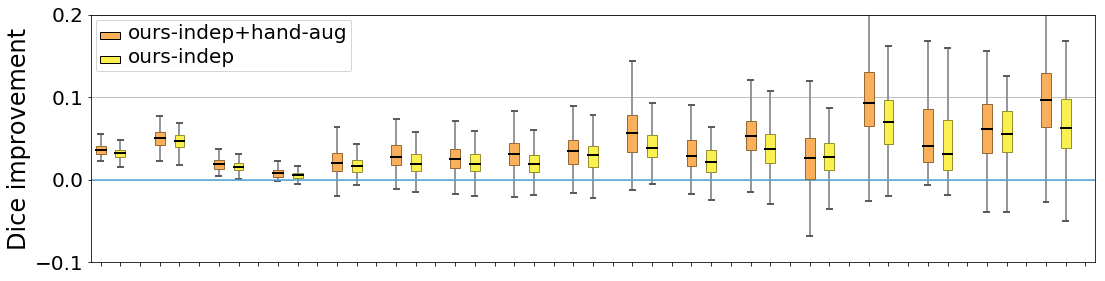

['Left-Cerebral-W. Matter', 'Right-Cerebral-W. Matter', 'Left-Cerebral-Cortex', 'Right-Cerebral-Cortex', 'Left-Cerebellum-Cortex', 'Right-Cerebellum-Cortex', 'Brain-Stem', 'Right-Cerebellum-W. Matter', 'Left-Cerebellum-W. Matter', 'Left-Lateral-Ventricle', 'Right-Lateral-Ventricle', 'Left-Thalamus', 'Right-Thalamus', 'Left-Putamen', 'Left-VentralDC', 'Right-Putamen', 'Right-VentralDC', 'Right-Hippocampus', 'Left-Hippocampus', 'Right-Caudate', 'Left-Caudate', '4th-Ventricle', 'Right-Pallidum', 'Left-Pallidum', 'Right-Amygdala', 'Left-Amygdala', '3rd-Ventricle', 'CSF', 'Right-choroid-plexus', 'Left-choroid-plexus']


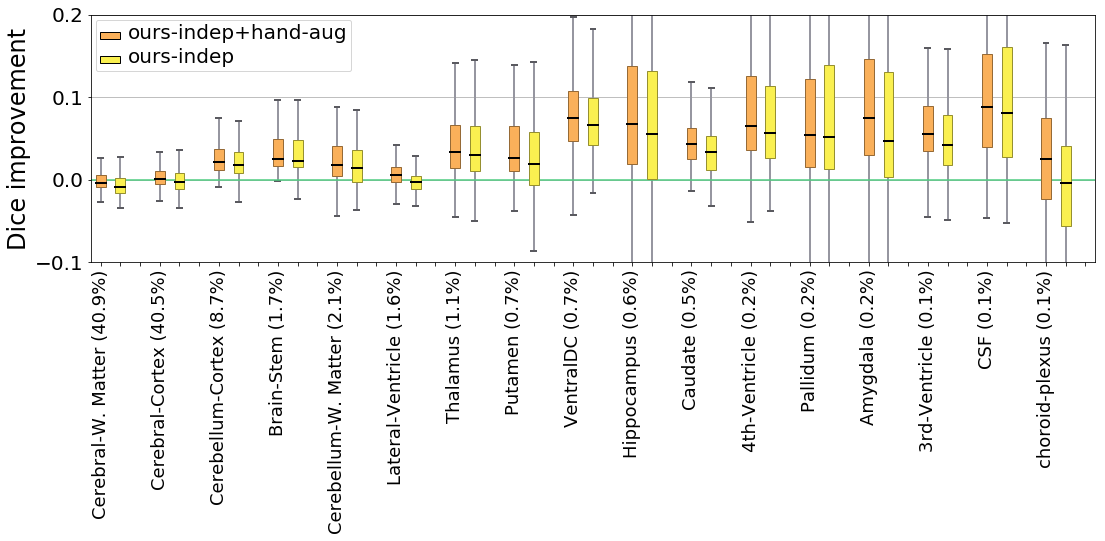

In [257]:
# relative dice per label
%load_ext autoreload
%autoreload 2
# format data the way that old voxelmorph boxplot code expects
import sys
sys.path.append('../voxelmorph-sandbox')
from voxelmorph.visualization import boxplot_utils, label_utils

#visualize_sorted_label_idxs = large_label_idxs
# visualize all labels
visualize_sorted_label_idxs = range(len(label_mapping))


baseline_name = 'sas-aug'


keep_result_idxs = [ result_names.index('ours-indep-hand-aug'),  result_names.index('ours-indep'), 
                    result_names.index(baseline_name)]
show_result_names = [result_names[ri] for ri in keep_result_idxs]

# exclude bkg
show_label_idxs = list(reversed([sort_label_idxs[si] for si in visualize_sorted_label_idxs]))[1:]
show_label_names = list(reversed([sorted_label_names[si] for si in visualize_sorted_label_idxs]))[1:]
print(show_label_names)

boxplot_label_names = []
dice_vals = []

for ri, rn in enumerate(show_result_names):
    combined_labels, combined_scores = label_utils.combine_lr_dice(
        show_label_names, 
        np.transpose(dice_per_result[result_names.index(rn)][:, show_label_idxs], (1, 0)),
        verbose=False
    )
    #boxplot_label_names.append([ln + '_{}'.format(rn) for ln in show_label_names])
    #dice_vals.append(np.transpose(dice_per_result[result_names.index(rn)][:, show_label_idxs], (1, 0)))
    
    for ci, cl in enumerate(combined_labels):
        matching_label_idxs = [i for i in range(len(sorted_label_names)) if cl in sorted_label_names[i]]
        total_percentage = np.sum(np.asarray(sorted_label_percentages)[matching_label_idxs])
        combined_labels[ci] += ' ({}%)'.format(round(100.*total_percentage,1)) 
    boxplot_label_names += [combined_labels]
    dice_vals += [np.asarray(combined_scores)]

diffs_vs_baseline = [dv - dice_vals[show_result_names.index(baseline_name)] for dv in dice_vals][:-1]

labels_to_display, labels_with_model_name_to_display, vals_to_display = boxplot_utils.format_data_for_boxplot(
    boxplot_label_names[:-1], diffs_vs_baseline)
ax = boxplot_utils.make_boxplot(
    labels_to_display, vals_to_display, 
    [rn.replace('sas','SAS').replace('ours-indep-hand-aug','ours-indep+hand-aug') for rn in show_result_names][:-1])
ax.set_ylim([-0.1, 0.2])
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.axhline(y=0, c=[0.3, 0.65, 0.85])
ax.get_xaxis().set_ticklabels([])
plt.ylabel('Dice improvement', fontsize=24)
plt.show()


# now do the same thing for sas-aug
baseline_name = 'hand-aug'
keep_result_idxs = [ result_names.index('ours-indep-hand-aug'),  result_names.index('ours-indep'), 
                    result_names.index(baseline_name)]
show_result_names = [result_names[ri] for ri in keep_result_idxs]

# exclude bkg
show_label_idxs = list(reversed([sort_label_idxs[si] for si in visualize_sorted_label_idxs]))[1:]
show_label_names = list(reversed([sorted_label_names[si] for si in visualize_sorted_label_idxs]))[1:]
print(show_label_names)

boxplot_label_names = []
dice_vals = []

for ri, rn in enumerate(show_result_names):
    combined_labels, combined_scores = label_utils.combine_lr_dice(
        show_label_names, 
        np.transpose(dice_per_result[result_names.index(rn)][:, show_label_idxs], (1, 0)),
        verbose=False
    )
    #boxplot_label_names.append([ln + '_{}'.format(rn) for ln in show_label_names])
    #dice_vals.append(np.transpose(dice_per_result[result_names.index(rn)][:, show_label_idxs], (1, 0)))
    
    for ci, cl in enumerate(combined_labels):
        matching_label_idxs = [i for i in range(len(sorted_label_names)) if cl in sorted_label_names[i]]
        total_percentage = np.sum(np.asarray(sorted_label_percentages)[matching_label_idxs])
        combined_labels[ci] += ' ({}%)'.format(round(100.*total_percentage,1)) 
    boxplot_label_names += [combined_labels]
    dice_vals += [np.asarray(combined_scores)]

diffs_vs_baseline = [dv - dice_vals[show_result_names.index(baseline_name)] for dv in dice_vals][:-1]

labels_to_display, labels_with_model_name_to_display, vals_to_display = boxplot_utils.format_data_for_boxplot(
    boxplot_label_names[:-1], diffs_vs_baseline)
ax = boxplot_utils.make_boxplot(labels_to_display, vals_to_display, 
                                [rn.replace('sas','SAS').replace('ours-indep-hand-aug','ours-indep+hand-aug') for rn in show_result_names][:-1])
ax.set_ylim([-0.1, 0.2])
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.axhline(y=0, c=[0.3, 0.8, 0.5])
plt.ylabel('Dice improvement', fontsize=24)
#ax.get_xaxis().set_ticklabels([])
plt.show()

In [ ]:
# format data the way that old voxelmorph boxplot code expects
sys.path.append('../voxelmorph-sandbox')
from voxelmorph.visualization import boxplot_utils

filter_label_idxs = large_label_idxs#med_label_idxs

show_label_idxs = list(reversed([sort_label_idxs[si] for si in filter_label_idxs]))
show_label_names = list(reversed([sorted_label_names[si] + ' ({}%)'.format(round(100.*sorted_label_percentages[si],1)) for si in filter_label_idxs]))
print(show_label_names)
boxplot_label_names = []
dice_vals = []
for ri, rn in enumerate(sorted_short_result_names):
    boxplot_label_names.append([ln + '_{}'.format(rn) for ln in show_label_names])
    
    dice_vals.append(np.transpose(dice_per_result[sort_result_idxs[ri]][:, show_label_idxs], (1, 0)))

labels_to_display, labels_with_model_name_to_display, vals_to_display = boxplot_utils.format_data_for_boxplot(boxplot_label_names, dice_vals)

_ = boxplot_utils.make_boxplot(labels_to_display, vals_to_display, sorted_short_result_names)

NameError: name 'small_label_idxs' is not defined

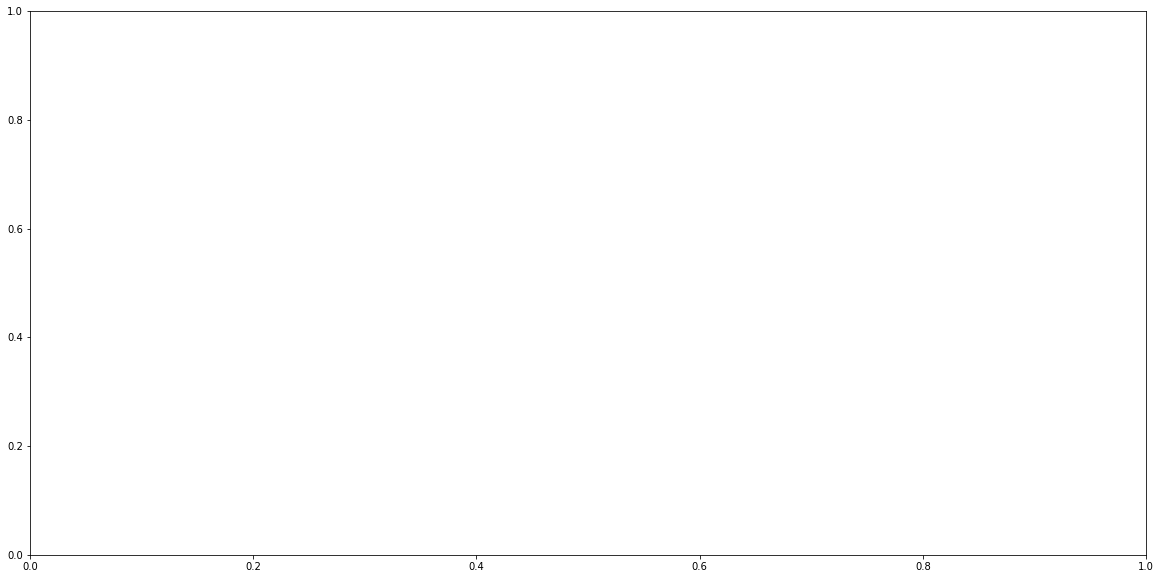

['Background', 'Brain-Stem', 'Left-Thalamus', 'Right-Thalamus', 'Left-Cerebellum-Cortex', 'Right-Cerebellum-Cortex', 'Left-Lateral-Ventricle', 'Right-Lateral-Ventricle', 'Left-Cerebellum-W. Matter', 'Right-Cerebellum-W. Matter', 'Left-Putamen', 'Right-Putamen', 'Left-Cerebral-W. Matter', 'Right-Cerebral-W. Matter', 'Left-VentralDC', 'Right-VentralDC', 'Left-Caudate', 'Right-Caudate', 'Left-Pallidum', 'Right-Pallidum', 'Left-Hippocampus', 'Right-Hippocampus', '3rd-Ventricle', '4th-Ventricle', 'Left-Amygdala', 'Right-Amygdala', 'CSF', 'Left-Cerebral-Cortex', 'Right-Cerebral-Cortex', 'Left-choroid-plexus', 'Right-choroid-plexus']
(8, 100, 31)
(8, 100)
range(0, 31)
(100, 31)
(100, 31)
(100, 31)
(100, 31)
(100, 31)


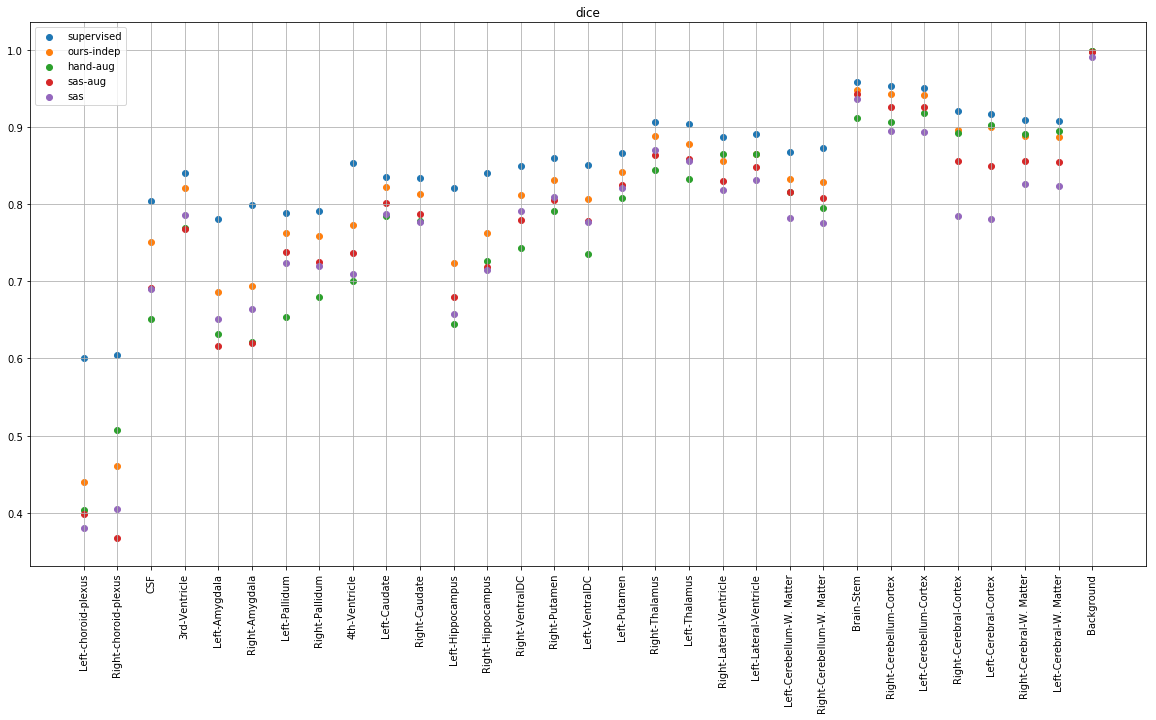

In [141]:
# scatter average dice over subjects, per label
label_names_file = '/afs/csail.mit.edu/u/x/xamyzhao/voxelmorph-sandbox/voxelmorph/jupyter/label_names.txt'
with open(label_names_file, 'r') as f:
    label_names = f.readlines()
label_name_mapping = [f.strip() for f in label_names]

sorted_label_ids = [label_mapping[si] for si in sort_label_idxs]
label_names = [label_name_mapping[li] for li in label_mapping]
sorted_label_names = [label_names[si] for si in sort_label_idxs]
print(label_names)
print(dice_per_result.shape)
print(acc_per_result.shape)

n_labels = len(label_names)

import matplotlib.pyplot as plt
# plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(20, 10))
x_axis = range(len(label_mapping))
print(x_axis)

show_result_idxs = [0, 2, 4, 5, 6]
#show_result_idxs = [0, 1, 2]
for ri, rn in enumerate(result_names):
    if show_result_idxs is not None and ri not in show_result_idxs:
        continue
    mean_dice_over_subjects = np.mean(dice_per_result[ri][:, sort_label_idxs], axis=0)
    dice_over_subjects = dice_per_result[ri][:, sort_label_idxs]
    print(dice_over_subjects.shape)
    
    #x_axis = np.tile(np.reshape(list(range(len(sort_label_idxs))), (1,31)), (100, 1))
    #plt.scatter(x_axis,dice_over_subjects)
    
    x_axis = range(n_labels)
    plt.scatter(x_axis, mean_dice_over_subjects)
    
plt.xticks(rotation=90)
ax.set_xticks(range(len(sorted_label_names)))
ax.set_xticklabels(sorted_label_names)

#     plt.xticks(rotation=90)
#     plt.xticks(rotation=90)
    #plt.plot(x, np.tile(np.mean(acc_per_result[ri]), (np.asarray(x).shape)))
if show_result_idxs is not None:
    plt.legend([result_names[ri] for ri in show_result_idxs if ri < len(result_names)])
else:
    plt.legend(result_names)
plt.title('dice')
plt.grid()
plt.show()



(8, 100, 31)
2
(100, 31)
(100, 31)
(100, 31)


[Text(0, 0, '31: Left-choroid-plexus'),
 Text(0, 0, '63: Right-choroid-plexus'),
 Text(0, 0, '24: CSF'),
 Text(0, 0, '14: 3rd-Ventricle'),
 Text(0, 0, '18: Left-Amygdala'),
 Text(0, 0, '54: Right-Amygdala'),
 Text(0, 0, '13: Left-Pallidum'),
 Text(0, 0, '52: Right-Pallidum'),
 Text(0, 0, '15: 4th-Ventricle'),
 Text(0, 0, '11: Left-Caudate'),
 Text(0, 0, '50: Right-Caudate'),
 Text(0, 0, '17: Left-Hippocampus'),
 Text(0, 0, '53: Right-Hippocampus'),
 Text(0, 0, '60: Right-VentralDC'),
 Text(0, 0, '51: Right-Putamen'),
 Text(0, 0, '28: Left-VentralDC'),
 Text(0, 0, '12: Left-Putamen'),
 Text(0, 0, '49: Right-Thalamus'),
 Text(0, 0, '10: Left-Thalamus'),
 Text(0, 0, '43: Right-Lateral-Ventricle'),
 Text(0, 0, '4: Left-Lateral-Ventricle'),
 Text(0, 0, '7: Left-Cerebellum-W. Matter'),
 Text(0, 0, '46: Right-Cerebellum-W. Matter'),
 Text(0, 0, '16: Brain-Stem'),
 Text(0, 0, '47: Right-Cerebellum-Cortex'),
 Text(0, 0, '8: Left-Cerebellum-Cortex'),
 Text(0, 0, '42: Right-Cerebral-Cortex'),
 Te

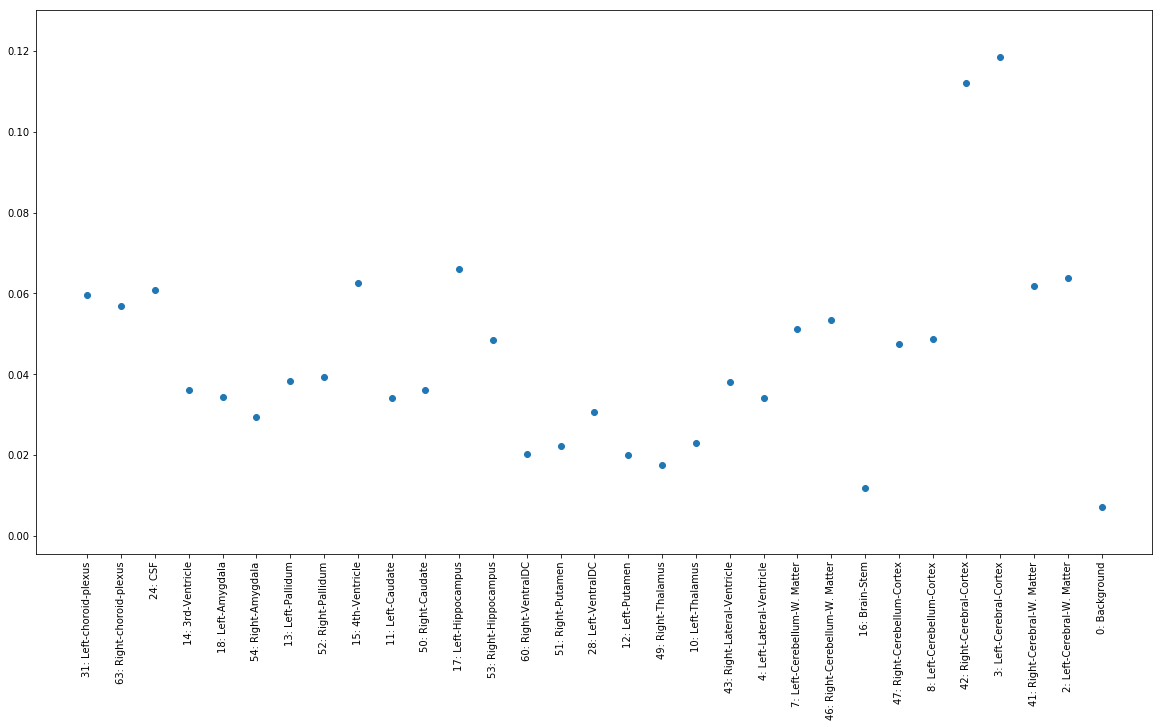

In [143]:
# look at difference between us and sas
fig, ax = plt.subplots(figsize=(20, 10))
print(dice_per_result.shape)
print(result_names.index('ours-indep'))
print(dice_per_result[result_names.index('sas'), :, :].shape)
dice_ours = dice_per_result[result_names.index('ours-indep'), :, :]
dice_ours = dice_ours[:, sort_label_idxs]
dice_sas = dice_per_result[result_names.index('sas'), :, :]
dice_sas = dice_sas[:, sort_label_idxs]
print(dice_ours.shape)
dice_diff = dice_ours - dice_sas
print(dice_diff.shape)
plt.scatter(range(n_labels), 
            np.mean(dice_diff, axis=0))
plt.xticks(rotation=90)
ax.set_xticks(range(len(sorted_label_names)))
ax.set_xticklabels(['{}: {}'.format(sorted_label_ids[si], sorted_label_names[si]) for si in range(len(label_mapping))])

In [ ]:
# print(len(eval_ds.files_labeled_test))
# for f in eval_ds.files_labeled_test:
#     print(os.path.basename(f))

In [ ]:
# show_idx = 17
# for i in [1]:#range(100):
#     show_idx = 10
#     print(i)
    
#     print(eval_ds.files_labeled_valid[show_idx])

#     data = np.load(eval_ds.files_labeled_valid[show_idx])
#     im = data['vol_data']
#     plt.imshow((im[:, :, 100]*255).astype(np.uint8))
#     print(eval_ds.X_labeled_valid.shape)
#     #plt.imshow((eval_ds.X_labeled_valid[show_idx, :, :, 100, 0]*255).astype(np.uint8))
#     IPython.display.display(PIL.Image.fromarray((eval_ds.X_labeled_valid[show_idx, :, :, 100, 0]*255).astype(np.uint8)))
#     IPython.display.display(PIL.Image.fromarray((eval_ds.Y_labeled_valid[show_idx, :, :, 100]*255).astype(np.uint8)))

In [ ]:
# for f in test_ds.all_files:
#     print(os.path.basename(f))

In [ ]:
# paired t test
import scipy.stats as sps
print(dice_per_result.shape)
our_mean_dice = np.mean(dice_per_result[result_names.index('ours-indep')], axis=-1)
handaug_mean_dice = np.mean(dice_per_result[result_names.index('hand-aug')], axis=-1)
sasaug_mean_dice = np.mean(dice_per_result[result_names.index('sas-aug')], axis=-1)
print(our_mean_dice.shape)
sps.ttest_rel(sasaug_mean_dice, our_mean_dice)